# Plotting some ARISE AOD stats for several ARISE days
Sep-7 and Sep-17 are "reference" days, and Sep-9 and Sep-24 are case study days
for comparing Polar-WRF with various cloud parameterization schemes

In [1]:
# upload moduls

import pandas as pd
import numpy as np
import scipy as sio
import scipy.stats as stats

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# to check moduls versions: pd.__version__

read csv files

In [2]:
# read ARISE AOD files

# set data dir

data_dir ='..//..//py_data//arise_aod//'

## loop over arise dates:

days2analyze = ['20140907','20140909','20140917','20140924']

#days2analyze = ['20140907']

i = 0
df = pd.DataFrame([])

for s in days2analyze:
    i=+ 1
    print 'days2analyze= ' + s
    fname = data_dir + '{}aod.csv'.format(s)
    print 'filename = ' + fname
    
    # read csv using the pandas library
    
    data            = pd.read_csv(fname, index_col=False, na_values=[-9999.0])
    data['Date']    = pd.Timestamp(s)
    data['TimeUTC'] = (data.Start_UTC/86400.)*24.
    
    df = df.append(data)


# assign new index
#df.set_index(['Date','TimeUTC'], inplace=True)
df.head()
        
        
    

days2analyze= 20140907
filename = ..//..//py_data//arise_aod//20140907aod.csv
days2analyze= 20140909
filename = ..//..//py_data//arise_aod//20140909aod.csv
days2analyze= 20140917
filename = ..//..//py_data//arise_aod//20140917aod.csv
days2analyze= 20140924
filename = ..//..//py_data//arise_aod//20140924aod.csv


,Start_UTC,Latitude,Longitude,GPS_alt,qual_flag,amass_aer,cWV1,std_cWV1,cWV2,resid_cWV2,...,UNCAOD0781,UNCAOD0865,UNCAOD1020,UNCAOD1040,UNCAOD1064,UNCAOD1236,UNCAOD1559,UNCAOD1627,Date,TimeUTC
0,66312,64.6570,-147.0938,185.0,1.0,2.731,NaN,4.677,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-07,18.420000
1,66313,64.6575,-147.0943,185.0,1.0,2.730,NaN,3.495,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-07,18.420278
2,66314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-07,18.420556
3,66315,64.6580,-147.0947,186.0,1.0,2.730,NaN,2.323,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-07,18.420833
4,66316,64.6586,-147.0952,188.0,1.0,2.730,NaN,2.956,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-07,18.421111


In [3]:
len(df)

102197

In [4]:
df.columns.tolist()

['Start_UTC',
 'Latitude',
 'Longitude',
 'GPS_alt',
 'qual_flag',
 'amass_aer',
 'cWV1',
 'std_cWV1',
 'cWV2',
 'resid_cWV2',
 'cO3',
 'resid_cO3',
 'cNO2',
 'resid_cNO2',
 'AOD0380',
 'AOD0452',
 'AOD0501',
 'AOD0520',
 'AOD0532',
 'AOD0550',
 'AOD0606',
 'AOD0620',
 'AOD0675',
 'AOD0781',
 'AOD0865',
 'AOD1020',
 'AOD1040',
 'AOD1064',
 'AOD1236',
 'AOD1559',
 'AOD1627',
 'UNCAOD0380',
 'UNCAOD0452',
 'UNCAOD0501',
 'UNCAOD0520',
 'UNCAOD0532',
 'UNCAOD0550',
 'UNCAOD0606',
 'UNCAOD0620',
 'UNCAOD0675',
 'UNCAOD0781',
 'UNCAOD0865',
 'UNCAOD1020',
 'UNCAOD1040',
 'UNCAOD1064',
 'UNCAOD1236',
 'UNCAOD1559',
 'UNCAOD1627',
 'Date',
 'TimeUTC']

In [8]:
# grouping
df_part = df[df['Date']=='2014-09-17']['AOD0501']
df_part.head()
len(df_part)

24841

In [9]:
# plots
matplotlib.style.use('ggplot')

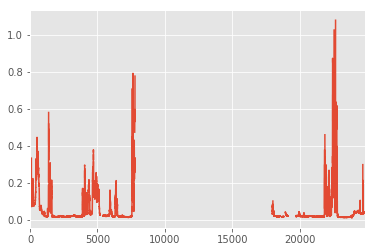

In [10]:
# timeseries
df_part.plot()

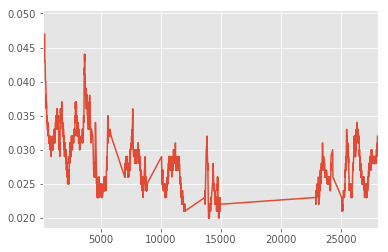

In [11]:
# filtered time series
df_part = df['AOD0501'][(df['Date']=='2014-09-07')&(df['qual_flag']==0)]
df_part.plot()

Plot histogram of AOD

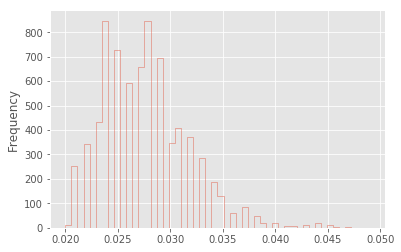

In [12]:
#output = plt.hist(df[df['Date']=='2014-09-07']['AOD0501'], bins=10, histtype='step', label=['2014-09-07'])
#plt.legend(loc='upper right')

# parse by qual_flag==0
ax1=df_part.plot.hist(alpha=0.8,bins=50,histtype='step')
fig = ax1.get_figure()
fig.savefig('../../py_figs/arise_aod/20140907AOD0501hist.png', bbox_inches='tight')

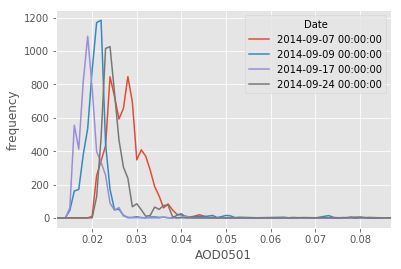

In [13]:
# overlay hist plots
# filter df for qual_flag=0
df_qual = df[df['qual_flag']==0]
ax=df_qual.groupby('Date').AOD0501.value_counts().unstack(0).fillna(0).plot()
fig = ax.get_figure()
ax.set_ylabel('frequency')
fig.savefig('../../py_figs/arise_aod/AOD0501hist_resize.png', bbox_inches='tight',dpi=1000)

In [14]:
# check amount of data not filtered for clouds
aod_group = df.groupby('Date')
aod_group.size()

Date
2014-09-07    29294
2014-09-09    26101
2014-09-17    24841
2014-09-24    21961
dtype: int64

In [15]:
# check amount of data  filtered for clouds
aod_group_filt = df_qual.groupby('Date')
aod_group_filt.size()

Date
2014-09-07    7430
2014-09-09    5467
2014-09-17    4958
2014-09-24    4946
dtype: int64

In [16]:
len(df_qual)

22801

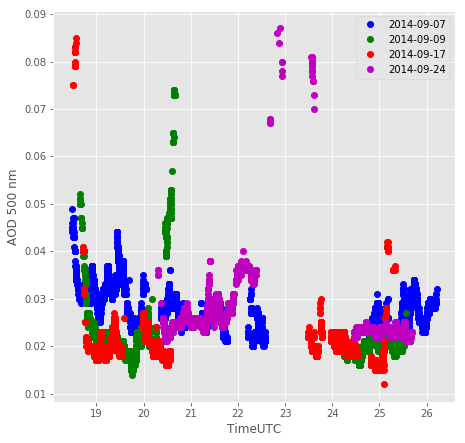

In [17]:
## create subdata frame 
#df_part = df['AOD0501'][(df['Date']=='2014-09-07')&(df['qual_flag']==0)]
#df_part = df['Date','TimeUTC','GPS_alt','AOD0501'][(df['qual_flag']==0)]
cols =['Date','TimeUTC','GPS_alt','AOD0501','qual_flag']
dfp = df[cols]
# filter out the state level data using boolean masking on the SUMLEV column
dfp=dfp[dfp['qual_flag']==0]
dfp.head()

#import matplotlib as mpl
#mpl.rcParams['axes.linewidth'] = 1 #set the value globally

fig = plt.figure(figsize=(7.195, 7.195), dpi=100)
#r-c-m-k
plt.plot(dfp['TimeUTC'][(dfp['Date']=='2014-09-07')],dfp['AOD0501'][(dfp['Date']=='2014-09-07')],
         'ob', label='2014-09-07')
plt.plot(dfp['TimeUTC'][(dfp['Date']=='2014-09-09')],dfp['AOD0501'][(dfp['Date']=='2014-09-09')],
         'og', label='2014-09-09')
plt.plot(dfp['TimeUTC'][(dfp['Date']=='2014-09-17')],dfp['AOD0501'][(dfp['Date']=='2014-09-17')],
         'or', label='2014-09-17')
plt.plot(dfp['TimeUTC'][(dfp['Date']=='2014-09-24')],dfp['AOD0501'][(dfp['Date']=='2014-09-24')],
         'om', label='2014-09-24')
plt.legend(loc='best') 
plt.xlabel('TimeUTC')
plt.ylabel('AOD 500 nm')
#for axis in ['top','bottom','left','right']:
#  ax.spines[axis].set_linewidth(0.5)
plt.show() 
fig.savefig('../../py_figs/arise_aod/AOD0501timeseries_resized_recolor.png', bbox_inches='tight',dpi=1000)

# Bin AOD data by altitude for each of the days

In [18]:

#bins = np.linspace(df_qual.GPS_alt.min(), df_qual.GPS_alt.max(), 20)
alt_bins = np.arange(0.,8000.,500.)
alt_bins

#alts.groupby(['Date']).AOD0501.value_counts().plot(kind='bar')

#orientation='horizontal'

array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,
        4000.,  4500.,  5000.,  5500.,  6000.,  6500.,  7000.,  7500.])

In [19]:
alt_names = alt_bins.astype('str')[0:-1]
alt_names

array(['0.0', '500.0', '1000.0', '1500.0', '2000.0', '2500.0', '3000.0',
       '3500.0', '4000.0', '4500.0', '5000.0', '5500.0', '6000.0',
       '6500.0', '7000.0'],
      dtype='|S32')

In [20]:
# create alt categories
#df_qual['alt_categories'] = pd.cut(df_qual['GPS_alt'], alt_bins, labels=alt_names)
#df_qual.head()

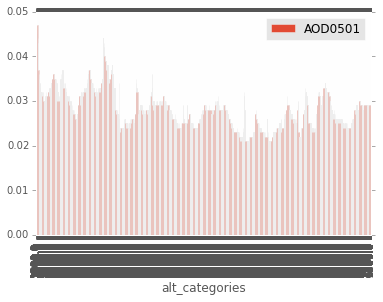

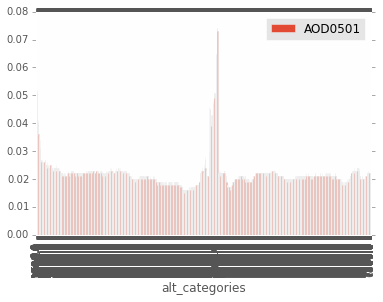

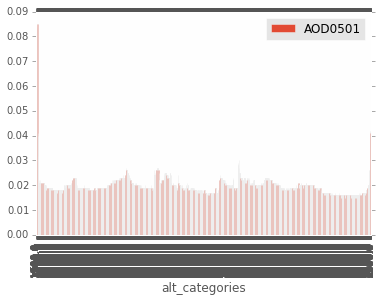

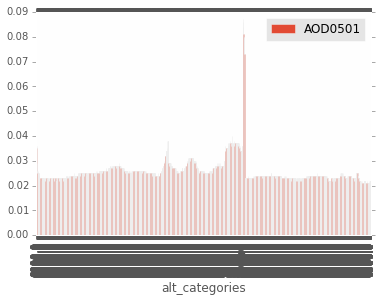

In [157]:
df_qual.groupby('Date').plot(kind='bar',y='AOD0501',x='alt_categories');

# Improved binning code

In [21]:
# make sure no NA
df_qual = df_qual.dropna() #The mapper won't be happy with NA values
len(df_qual)

19972

In [22]:
df_qual.head()

,Start_UTC,Latitude,Longitude,GPS_alt,qual_flag,amass_aer,cWV1,std_cWV1,cWV2,resid_cWV2,...,UNCAOD0781,UNCAOD0865,UNCAOD1020,UNCAOD1040,UNCAOD1064,UNCAOD1236,UNCAOD1559,UNCAOD1627,Date,TimeUTC
188,66500,64.8042,-147.2030,1355.064,0.0,2.713,0.347,0.027,0.374,0.029,...,0.011,0.011,0.011,0.011,0.011,0.011,0.011,0.011,2014-09-07,18.472222
227,66539,64.8382,-147.1952,1597.313,0.0,2.709,0.303,0.026,0.324,0.027,...,0.011,0.011,0.011,0.011,0.011,0.011,0.011,0.016,2014-09-07,18.483056
234,66546,64.8445,-147.1939,1651.000,0.0,2.708,0.331,0.025,0.334,0.026,...,0.011,0.011,0.011,0.011,0.011,0.011,0.011,0.012,2014-09-07,18.485000
235,66547,64.8455,-147.1937,1661.000,0.0,2.708,0.329,0.024,0.332,0.025,...,0.011,0.011,0.011,0.011,0.011,0.011,0.012,0.012,2014-09-07,18.485278
236,66548,64.8464,-147.1935,1671.000,0.0,2.708,0.327,0.023,0.328,0.026,...,0.011,0.011,0.011,0.011,0.011,0.011,0.012,0.013,2014-09-07,18.485556


# a warpper to bin data

In [23]:

#Write a short mapper that bins data
def map_bin(x, bins):
    kwargs = {}
    if x == max(bins):
        kwargs['right'] = True
    bin = bins[np.digitize([x], bins, **kwargs)[0]]
    bin_lower = bins[np.digitize([x], bins, **kwargs)[0]-1]
    return '[{0}-{1}]'.format(bin_lower, bin)

In [24]:
# bin data
freq_bins = np.arange(0., 8000., 500.)

In [25]:
# check mapper
map_bin(500, freq_bins)

'[500.0-1000.0]'

In [26]:
# map our dataframe
df_qual['Binned'] = df_qual['GPS_alt'].apply(map_bin, bins=freq_bins)
df_qual[['GPS_alt','Binned']][:10]

C:\Users\msegalro.NDC\WinPython-64bit-2.7.9.5\python-2.7.9.amd64\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


,GPS_alt,Binned
188,1355.064,[1000.0-1500.0]
227,1597.313,[1500.0-2000.0]
234,1651.000,[1500.0-2000.0]
235,1661.000,[1500.0-2000.0]
236,1671.000,[1500.0-2000.0]
245,1746.000,[1500.0-2000.0]
246,1752.000,[1500.0-2000.0]
247,1757.000,[1500.0-2000.0]
262,1854.000,[1500.0-2000.0]
276,1950.000,[1500.0-2000.0]


Group data by bin and average per each bin

In [27]:
grouped = df_qual.groupby(['Date','Binned'])
grouped_data = grouped.mean()
grouped_data.head()
#len(grouped_data)

Start_UTC   Latitude   Longitude      GPS_alt  \
Date       Binned                                                              
2014-09-07 [1000.0-1500.0]  66500.000000  64.804200 -147.203000  1355.064000   
           [1500.0-2000.0]  66557.333333  64.854933 -147.190989  1737.701444   
           [2000.0-2500.0]  66629.473684  64.920632 -147.174084  2225.894737   
           [2500.0-3000.0]  66715.857143  65.000643 -147.154014  2750.857143   
           [3000.0-3500.0]  66824.933333  65.106040 -147.126680  3323.933333   

                            qual_flag  amass_aer      cWV1  std_cWV1  \
Date       Binned                                                      
2014-09-07 [1000.0-1500.0]        0.0   2.713000  0.347000  0.027000   
           [1500.0-2000.0]        0.0   2.706889  0.310667  0.023000   
           [2000.0-2500.0]        0.0   2.698579  0.258579  0.018579   
           [2500.0-3000.0]        0.0   2.689143  0.251714  0.017714   
           [3000.0-3500.0]        0.0   2.678000  0.213667  0.015267   

                                cWV2  resid_cWV2    ...      UNCAOD0675  \
Date       Binned                                   ...                   
2014-09-07 [1000.0-1500.0]  0.374000    0.029000    ...           0.011   
           [1500.0-2000.0]  0.312778    0.025000    ...           0.011   
           [2000.0-2500.0]  0.265263    0.020421    ...           0.011   
           [2500.0-3000.0]  0.246571    0.019500    ...           0.011   
           [3000.0-3500.0]  0.214533    0.016733    ...           0.011   

                            UNCAOD0781  UNCAOD0865  UNCAOD1020  UNCAOD1040  \
Date       Binned                                                            
2014-09-07 [1000.0-1500.0]       0.011       0.011       0.011    0.011000   
           [1500.0-2000.0]       0.011       0.011       0.011    0.011000   
           [2000.0-2500.0]       0.011       0.011       0.011    0.011000   
           [2500.0-3000.0]       0.011       0.011       0.011    0.011071   
           [3000.0-3500.0]       0.011       0.011       0.011    0.011067   

                            UNCAOD1064  UNCAOD1236  UNCAOD1559  UNCAOD1627  \
Date       Binned                                                            
2014-09-07 [1000.0-1500.0]    0.011000    0.011000    0.011000    0.011000   
           [1500.0-2000.0]    0.011000    0.011000    0.011444    0.012778   
           [2000.0-2500.0]    0.011000    0.011105    0.011842    0.012158   
           [2500.0-3000.0]    0.011000    0.011000    0.011714    0.012571   
           [3000.0-3500.0]    0.011067    0.011267    0.011533    0.012667   

                              TimeUTC  
Date       Binned                      
2014-09-07 [1000.0-1500.0]  18.472222  
           [1500.0-2000.0]  18.488148  
           [2000.0-2500.0]  18.508187  
           [2500.0-3000.0]  18.532183  
           [3000.0-3500.0]  18.562481  

[5 rows x 49 columns]

In [28]:
gd = pd.DataFrame(grouped_data['AOD0501'])
gd.head()
gd=gd.reset_index()
gd.head()
gd.rename(columns={'Binned':'Altitude bins [m]'},inplace=True)
gd.columns.tolist()
#?df.rename()

['Date', 'Altitude bins [m]', 'AOD0501']

In [29]:
# list unique altitude bins values
list(gd['Altitude bins [m]'].unique())

['[1000.0-1500.0]',
 '[1500.0-2000.0]',
 '[2000.0-2500.0]',
 '[2500.0-3000.0]',
 '[3000.0-3500.0]',
 '[3500.0-4000.0]',
 '[4000.0-4500.0]',
 '[4500.0-5000.0]',
 '[5000.0-5500.0]',
 '[5500.0-6000.0]',
 '[6000.0-6500.0]',
 '[6500.0-7000.0]',
 '[7000.0-7500.0]',
 '[0.0-500.0]',
 '[500.0-1000.0]']

In [30]:
# order the altitude bins:
gd['Altitude bins [m]']=gd['Altitude bins [m]'].astype('category',
                          categories=['[7000.0-7500.0]','[6500.0-7000.0]','[6000.0-6500.0]','[5500.0-6000.0]',
                                      '[5000.0-5500.0]','[4500.0-5000.0]','[3500.0-4000.0]','[3000.0-3500.0]',
                                      '[2500.0-3000.0]','[2000.0-2500.0]','[1500.0-2000.0]','[1000.0-1500.0]',
                                      '[500.0-1000.0]','[0.0-500.0]'],
                          ordered=True)
gd.head()

,Date,Altitude bins [m],AOD0501
0,2014-09-07,[1000.0-1500.0],0.049000
1,2014-09-07,[1500.0-2000.0],0.044778
2,2014-09-07,[2000.0-2500.0],0.044842
3,2014-09-07,[2500.0-3000.0],0.041357
4,2014-09-07,[3000.0-3500.0],0.035867


:0: FutureWarning: IPython widgets are experimental and may change in the future.


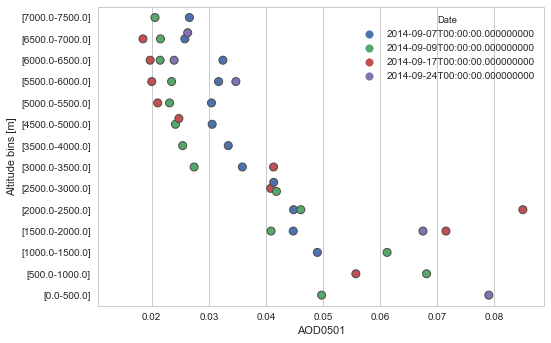

In [31]:
import seaborn as sns

sns.set(style="whitegrid", color_codes=True)

ax=sns.swarmplot(x="AOD0501", y="Altitude bins [m]", hue="Date", data=gd,size=8,linewidth=1);
fig = ax.get_figure()
fig.savefig('../../py_figs/arise_aod/AOD0501_byAltBins.png', bbox_inches='tight')

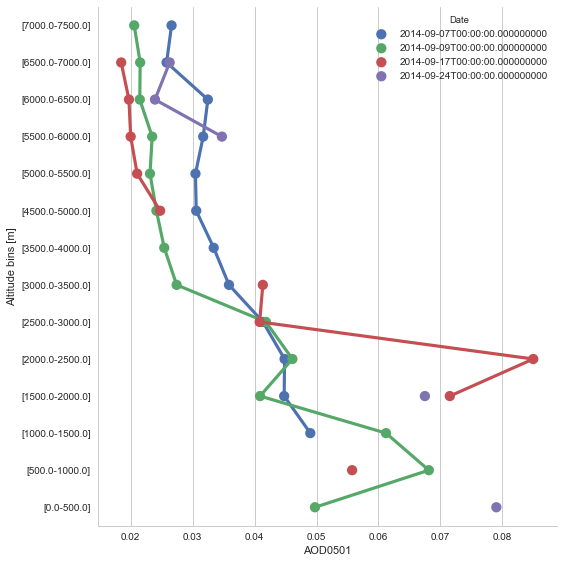

In [32]:
# add lines
sns_plot = sns.factorplot(x="AOD0501", y="Altitude bins [m]", hue="Date", data=gd, size=8,linewidth=1,legend_out=False);
sns_plot.savefig('../../py_figs/arise_aod/AOD0501_byAltBins_wLines_resize.png',dpi=1000)

# Combine AOD data with ARISE profiles

In [ ]:
# load profile summary .csv file
